# Indian Car Sales Analysis

In [1]:
# importing modules for computation & data visualization
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore');

In [2]:
# Runtime Parameters

#import matplotlib as mpl 
# mpl.rcParams['axes.labelsize']=16
#mpl.rcParams['figure.dpi']=200

In [3]:
# load data
df=pd.read_csv("cars_sales.csv")

In [4]:
# features in the data
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [5]:
df.shape

(1274, 141)

In [6]:
#type of data
df.dtypes

Unnamed: 0             int64
Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 141, dtype: object

In [7]:
pd.set_option('display.max_columns', None)

wheelbase
type has one null 303 index
Arai Mileage
Fuel tank capacity
Drive train
cylinder config
engine location

In [8]:
# Stats about the data
df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1274.000000,1260.000000,1204.000000,1272.000000,1270.000000,1139.000000,27.000000
mean,636.500000,4.354762,3.971761,4.555031,5.276378,3.783143,1.851852
std,367.916431,1.576843,0.839110,0.741141,1.138893,2.522907,0.769800
min,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000
25%,318.250000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,636.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,954.750000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1273.000000,12.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [9]:
df.sample(5)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1156,1156,Bmw,6-Series,630I Gt Luxury Line,"Rs. 64,40,000",4395 cc,8.0,4.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,70 litres,Petrol,1369 mm,4894 mm,1894 mm,Coupe,2.0,4.45 km/litre,7.94 km/litre,7.94 km/litre,NaN,NaN,8,124 mm,Ventilated Disc,Ventilated Disc,Aluminium double-joint springs strut axle with...,Aluminium integral axle with anti-roll bar,1600 mm,1665 mm,245/40,245/40,Electric Power,All Windows,"Yes, with memory",NaN,450PS@5500rpm,NaN,NaN,NaN,Yes,NaN,4.0,Leather,Automatic,2855 mm,R19,NaN,NaN,CD Player with USB & Aux-in,NaN,NaN,NaN,Yes,Internal,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Internal,NaN,Manual,Analog,NaN,NaN,Yes,Driver & Front Passenger,NaN,Fully automatic climate control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,"Driver frontal airbag, Front passenger frontal...",NaN,NaN,Yes,NaN,6.0,16.7:1,"Rake, Reach",NaN,NaN,Rear sensors,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Semi Automatic Adjustment,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Only front,NaN,NaN,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
450,450,Tata,Tigor,Revotron Xm,"Rs. 6,10,000",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,35 litres,Petrol,1537 mm,3992 mm,1677 mm,Sedan,4.0,24.12 km/litre,23 km/litre,23 km/litre,NaN,992 kg,5,165 mm,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; closed profile Twist beam wi...,NaN,NaN,155/80 R13,155/80 R13,Electric Power,All Windows,NaN,NaN,86PS@6000rpm,113Nm@3300rpm,Digital,Analog,Analog,2,5.0,Vinyl,Manual,2450 mm,155/80 R13,NaN,Yes,CD/MP3/DVD Player with USB & Aux-i

Important features regarding the dataset

## Data Wrangling

In [10]:
df.isnull().sum()

Unnamed: 0              0
Make                    9
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1261
Electric_Range       1257
Length: 141, dtype: int64

df.Make[df.Make=='Land Rover Rover']='Land Rover' 
df.Make[df.Make=='Maruti Suzuki R']='Maruti Suzuki' # Replacing/ Correcting the data
df.Make[df.Model=='Go+']='Datsun'
df.at[303,'Type']="Automatic"
df.at[303,'Drivetrain']='RWD (Rear Wheel Drive)'

In [11]:
df['Car']=df.Make + ' ' + df.Model # Car just for convienence

## Columns that are Important and research focused

In [12]:
columns = ['Car','Make','Model','Variant','Ex-Showroom_Price','Body_Type','Fuel_Type','Fuel_Tank_Capacity','Displacement','Cylinders',
     'Power','Torque','Type','Drivetrain','ARAI_Certified_Mileage','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']

In [13]:
car_df=df[columns]

In [14]:
car_df.Make[car_df.Make=='Land Rover Rover']='Land Rover' 
car_df.Make[car_df.Make=='Maruti Suzuki R']='Maruti Suzuki' # Replacing/ Correcting the data
car_df.Make[car_df.Model=='Go+']='Datsun'
car_df.at[303,'Type']="Automatic"
car_df.at[303,'Drivetrain']='RWD (Rear Wheel Drive)'

In [15]:
# Displacement and cylinders are not present in electric vehicles
car_df.Displacement[car_df.Fuel_Type=='Electric']=0
car_df.Cylinders[car_df.Cylinders.isna()]=0
# 0 for nan in airbags
car_df.Number_of_Airbags.fillna(0,inplace= True)
car_df.Seating_Capacity.fillna(method='ffill',inplace=True)
car_df.Doors.fillna(np.round(car_df.Doors.mean()),inplace=True)


In [16]:
car_df['Ex-Showroom_Price']=car_df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
car_df['Ex-Showroom_Price'] = car_df['Ex-Showroom_Price'].str.replace(',','',regex=False)
car_df['Ex-Showroom_Price'] = car_df['Ex-Showroom_Price'].astype(int)
car_df.rename(columns={'Ex-Showroom_Price':'Price'},inplace=True)

In [17]:
car_df = car_df[df.Width.notnull()]

In [18]:
car_df['Height'] = car_df['Height'].str.replace(' mm','',regex=False).astype(float)
car_df['Length'] = car_df['Length'].str.replace(' mm','',regex=False).astype(float)
car_df['Width'] =  car_df['Width'].str.replace(' mm','',regex=False).astype(float)
car_df['Wheelbase'] = car_df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
car_df['Fuel_Tank_Capacity'] = car_df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
car_df['Displacement'] = car_df['Displacement'].str.replace(' cc','',regex=False)
car_df.loc[car_df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
car_df.loc[car_df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
car_df.loc[car_df.ARAI_Certified_Mileage == '22.4-21.9 km/litre','ARAI_Certified_Mileage']='22'
car_df['ARAI_Certified_Mileage'] = car_df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)

In [19]:
#power from PS to HP          1 ps=0.98632 hp                               
HP = car_df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = car_df.Torque.str.extract(r'(\d{1,4}).*').astype(float) 
TQ= TQ.apply(lambda x: round(x,2))
car_df.Torque = TQ
car_df.Power = HP

In [20]:
car_df.Doors = car_df.Doors.astype(int)
car_df.Seating_Capacity = car_df.Seating_Capacity.astype(int)
car_df.Number_of_Airbags = car_df.Number_of_Airbags.astype(int)
car_df.Displacement = car_df.Displacement.astype(float)
car_df.Cylinders = car_df.Cylinders.astype(int)

In [21]:
car_df.dtypes

Car                        object
Make                       object
Model                      object
Variant                    object
Price                       int32
Body_Type                  object
Fuel_Type                  object
Fuel_Tank_Capacity        float64
Displacement              float64
Cylinders                   int32
Power                     float64
Torque                    float64
Type                       object
Drivetrain                 object
ARAI_Certified_Mileage    float64
Height                    float64
Length                    float64
Width                     float64
Doors                       int32
Seating_Capacity            int32
Wheelbase                 float64
Number_of_Airbags           int32
dtype: object

In [22]:
car_df.head(2)

,Car,Make,Model,Variant,Price,Body_Type,Fuel_Type,Fuel_Tank_Capacity,Displacement,Cylinders,Power,Torque,Type,Drivetrain,ARAI_Certified_Mileage,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
0,Tata Nano Genx,Tata,Nano Genx,Xt,292667,Hatchback,Petrol,24.0,624.0,2,37.48,51.0,Manual,RWD (Rear Wheel Drive),23.6,1652.0,3164.0,1750.0,5,4,2230.0,0
1,Tata Nano Genx,Tata,Nano Genx,Xe,236447,Hatchback,Petrol,24.0,624.0,2,37.48,51.0,Manual,RWD (Rear Wheel Drive),23.6,1652.0,3164.0,1750.0,5,4,2230.0,0


## Exploratory Data Analysis

In [23]:
car_df.corr()['Price'].sort_values(ascending=False)

Price                     1.000000
Displacement              0.871632
Power                     0.851950
Cylinders                 0.845714
Torque                    0.717336
Fuel_Tank_Capacity        0.643359
Wheelbase                 0.542739
Length                    0.507976
Width                     0.496112
Number_of_Airbags         0.391501
ARAI_Certified_Mileage   -0.035541
Height                   -0.165867
Seating_Capacity         -0.308379
Doors                    -0.492930
Name: Price, dtype: float64

In [24]:
car_df.Make.unique() #We have 38 companies selling cars in India

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls Royce', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia', 'Mitsubishi'],
      dtype=object)

In [25]:
car_df.Car.nunique() # Total different models in the market

259

In [26]:
car_df.Make[car_df.Make=='Maruti Suzuki'].count() # Maruti cars

163

In [115]:
car_df.Type.value_counts()

Manual       725
Automatic    521
AMT           18
DCT            7
CVT            3
Name: Type, dtype: int64

In [27]:
car_df.nlargest(5,'Price') # Top 5 expensive cars are Rolls Royce cars

,Car,Make,Model,Variant,Price,Body_Type,Fuel_Type,Fuel_Tank_Capacity,Displacement,Cylinders,Power,Torque,Type,Drivetrain,ARAI_Certified_Mileage,Height,Length,Width,Doors,Seating_Capacity,Wheelbase,Number_of_Airbags
1217,Rolls Royce Phantom,Rolls Royce,Phantom,Sedan,95000000,Sedan,Petrol,100.0,6749.0,12,453.71,720.0,Automatic,RWD (Rear Wheel Drive),23.0,1638.0,5842.0,1990.0,4,5,3570.0,6
878,Rolls Royce Drophead Coupe,Rolls Royce,Drophead Coupe,Phantom,83755383,Convertible,Petrol,100.0,6749.0,12,446.80,720.0,Automatic,RWD (Rear Wheel Drive),9.8,1638.0,5842.0,1990.0,2,4,3570.0,6
354,Rolls Royce Phantom Coupe,Rolls Royce,Phantom Coupe,6.8 L,77312661,Coupe,Petrol,100.0,6749.0,12,453.71,720.0,Automatic,RWD (Rear Wheel Drive),22.8,1598.0,5612.0,1987.0,2,4,3320.0,6
1218,Rolls Royce Phantom,Rolls Royce,Phantom,Ewb,75400000,Sedan,Petrol,100.0,6749.0,12,453.71,720.0,Automatic,RWD (Rear Wheel Drive),23.0,1640.0,6092.0,1990.0,4,5,3820.0,6
353,Rolls Royce Cullinan,Rolls Royce,Cullinan,Suv,69500000,SUV,Petrol,NaN,6750.0,12,555.30,850.0,Automatic,AWD (All Wheel Drive),22.0,1835.0,5341.0,2000.0,5,5,3295.0,0


In [28]:
car_df.Price.groupby(by=car_df.Make).mean().sort_values()

Make
Bajaj            2.730000e+05
Datsun           4.960754e+05
Premier          6.376038e+05
Maruti Suzuki    6.738911e+05
Fiat             7.795563e+05
Renault          8.011078e+05
Tata             9.371146e+05
Icml             9.700829e+05
Hyundai          9.874765e+05
Mahindra         1.105725e+06
Ford             1.123854e+06
Force            1.150500e+06
Honda            1.206137e+06
Volkswagen       1.321924e+06
Mg               1.610308e+06
Toyota           1.653056e+06
Nissan           1.695369e+06
Kia              1.701143e+06
Skoda            1.973879e+06
Isuzu            2.225393e+06
Jeep             3.203428e+06
Dc               3.407407e+06
Mitsubishi       3.456193e+06
Mini             3.792000e+06
Volvo            5.834750e+06
Audi             7.240431e+06
Bmw              8.256216e+06
Mercedes Benz    9.479082e+06
Jaguar           1.046450e+07
Land Rover       1.429447e+07
Lexus            1.501530e+07
Porsche          1.534600e+07
Maserati         1.569689e+07
Aston

## Data Visualization

### Correlation between different features

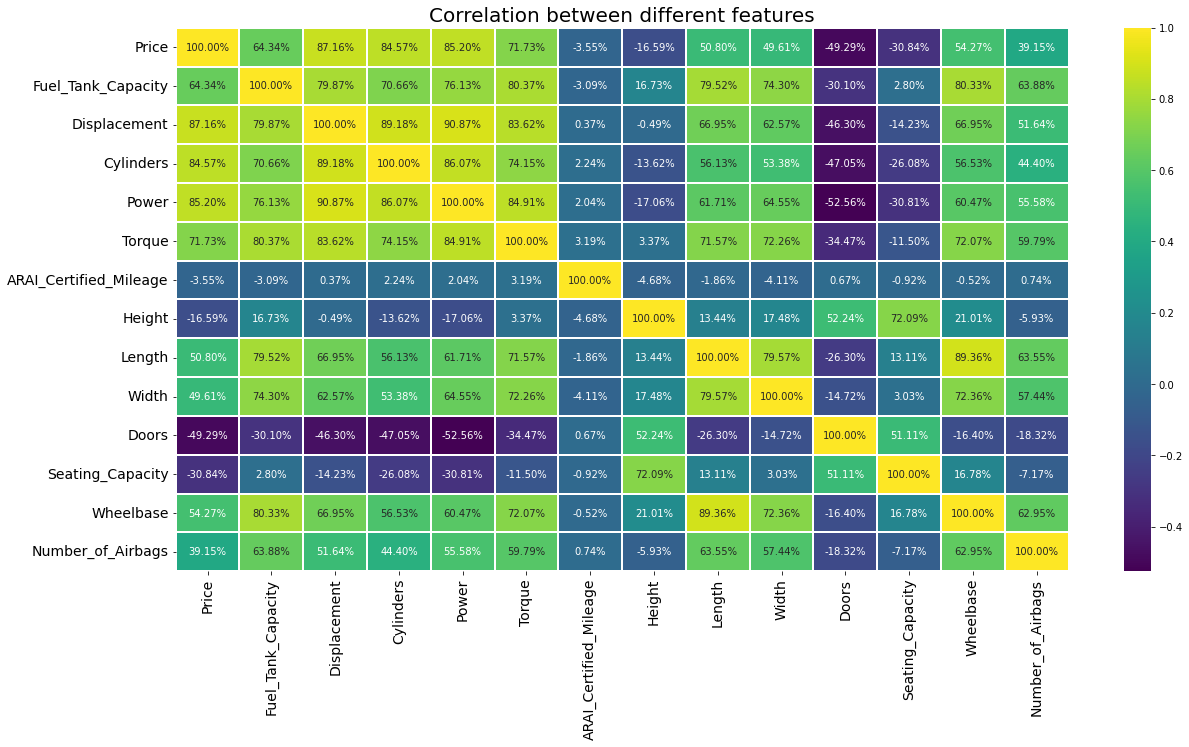

In [53]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(car_df.corr(),annot=True,fmt=".2%",cmap='viridis',linewidth=0.3)
plt.title('Correlation between different features',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

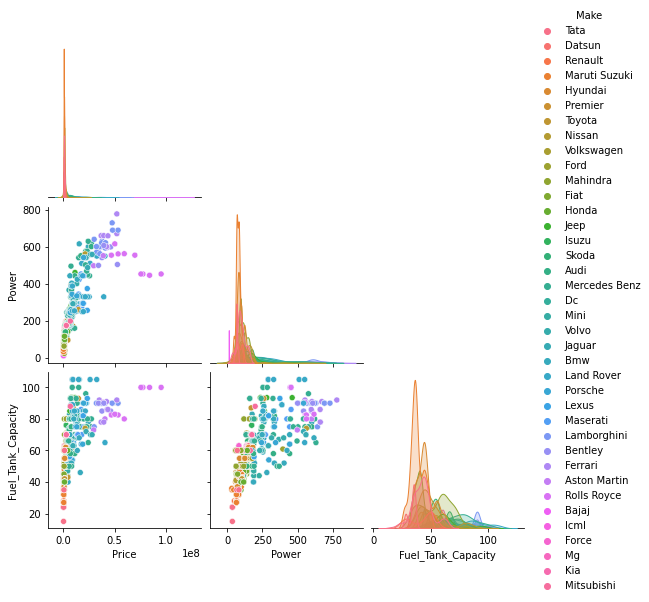

In [153]:
sns.pairplot(data=car_df,vars=['Price','Power','Fuel_Tank_Capacity'],hue='Make',corner=True)

### Distribution of cars based on Price

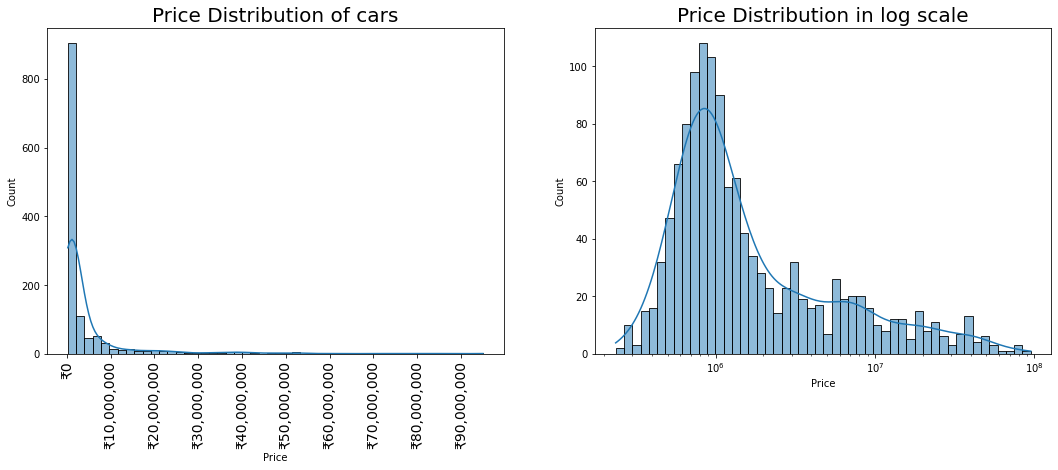

In [77]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
axes[0].set_title("Price Distribution of cars",fontsize=20)
axes[0].set_xticks([i for i in range(0,100000000,10000000)],[f'₹{i:,}' for i in range(0,100000000,10000000)],
                   fontsize=14,rotation=90);
sns.histplot(data=car_df,x='Price',ax=axes[0],bins=50,kde=True)

axes[1].set_title('Price Distribution in log scale',fontsize=20)
sns.histplot(data=car_df,x='Price',ax=axes[1],bins=50,kde=True,log_scale=True);

* Most cars are in the ₹ 500000 - ₹ 1000000 bin
* Around 60% of cars are priced under ₹ 1,500,000

### Price distribution of car based on Body Type

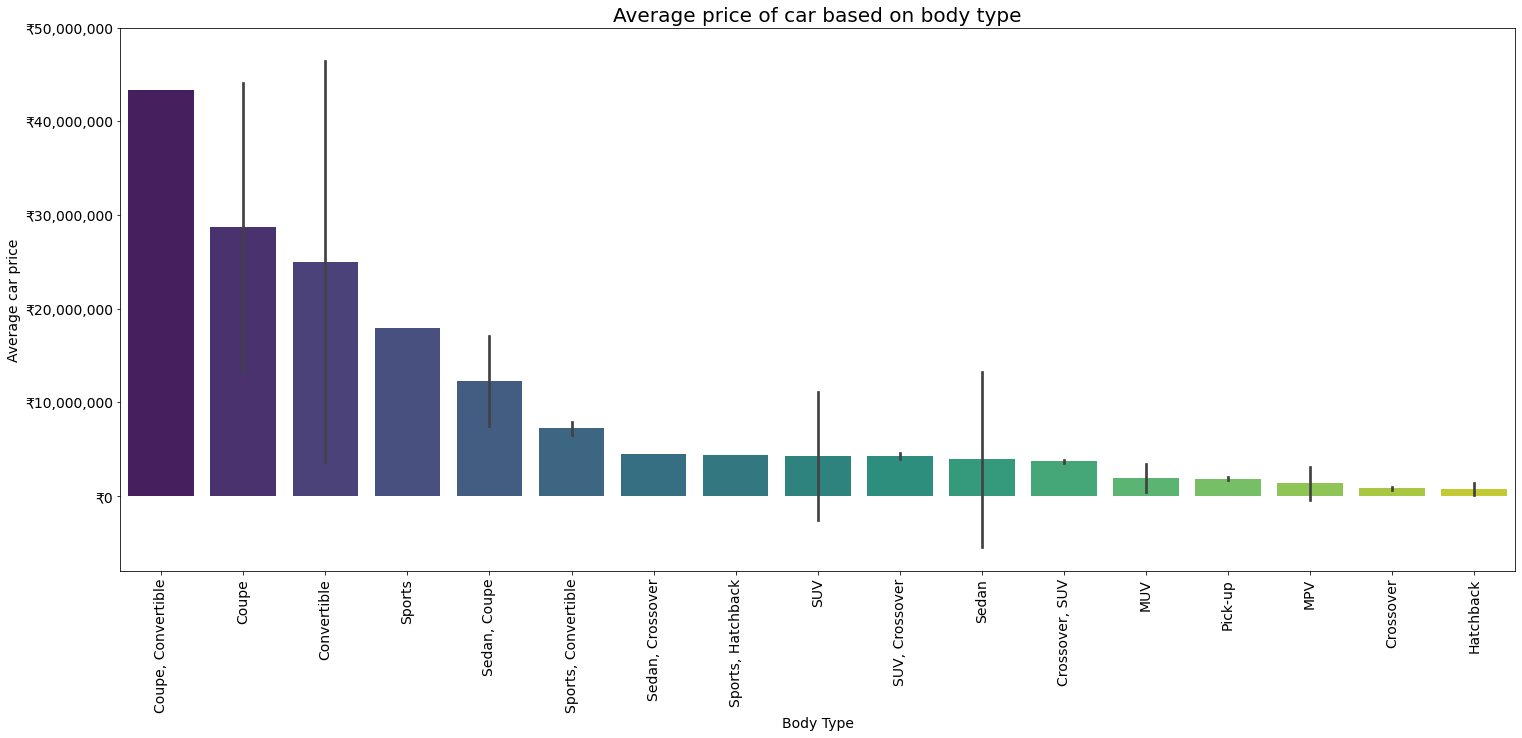

In [57]:
plt.figure(figsize=(25,10))
sns.barplot(data=car_df, x= 'Body_Type', ci= 'sd', y= 'Price', palette='viridis',order=car_df.groupby('Body_Type')['Price'].mean().sort_values(ascending=False).index);

plt.title('Average price of car based on body type',fontsize=20)
plt.yticks([i for i in range(0,60000000,10000000)],[f'₹{i:,}' for i in range(0,60000000,10000000)],fontsize=14);
plt.xlabel('Body Type',fontsize=14)
plt.ylabel('Average car price', fontsize=14)
plt.xticks(fontsize=14,rotation=90);

* On an average, expensive cars are of Coupe, Convertible, or sports type 

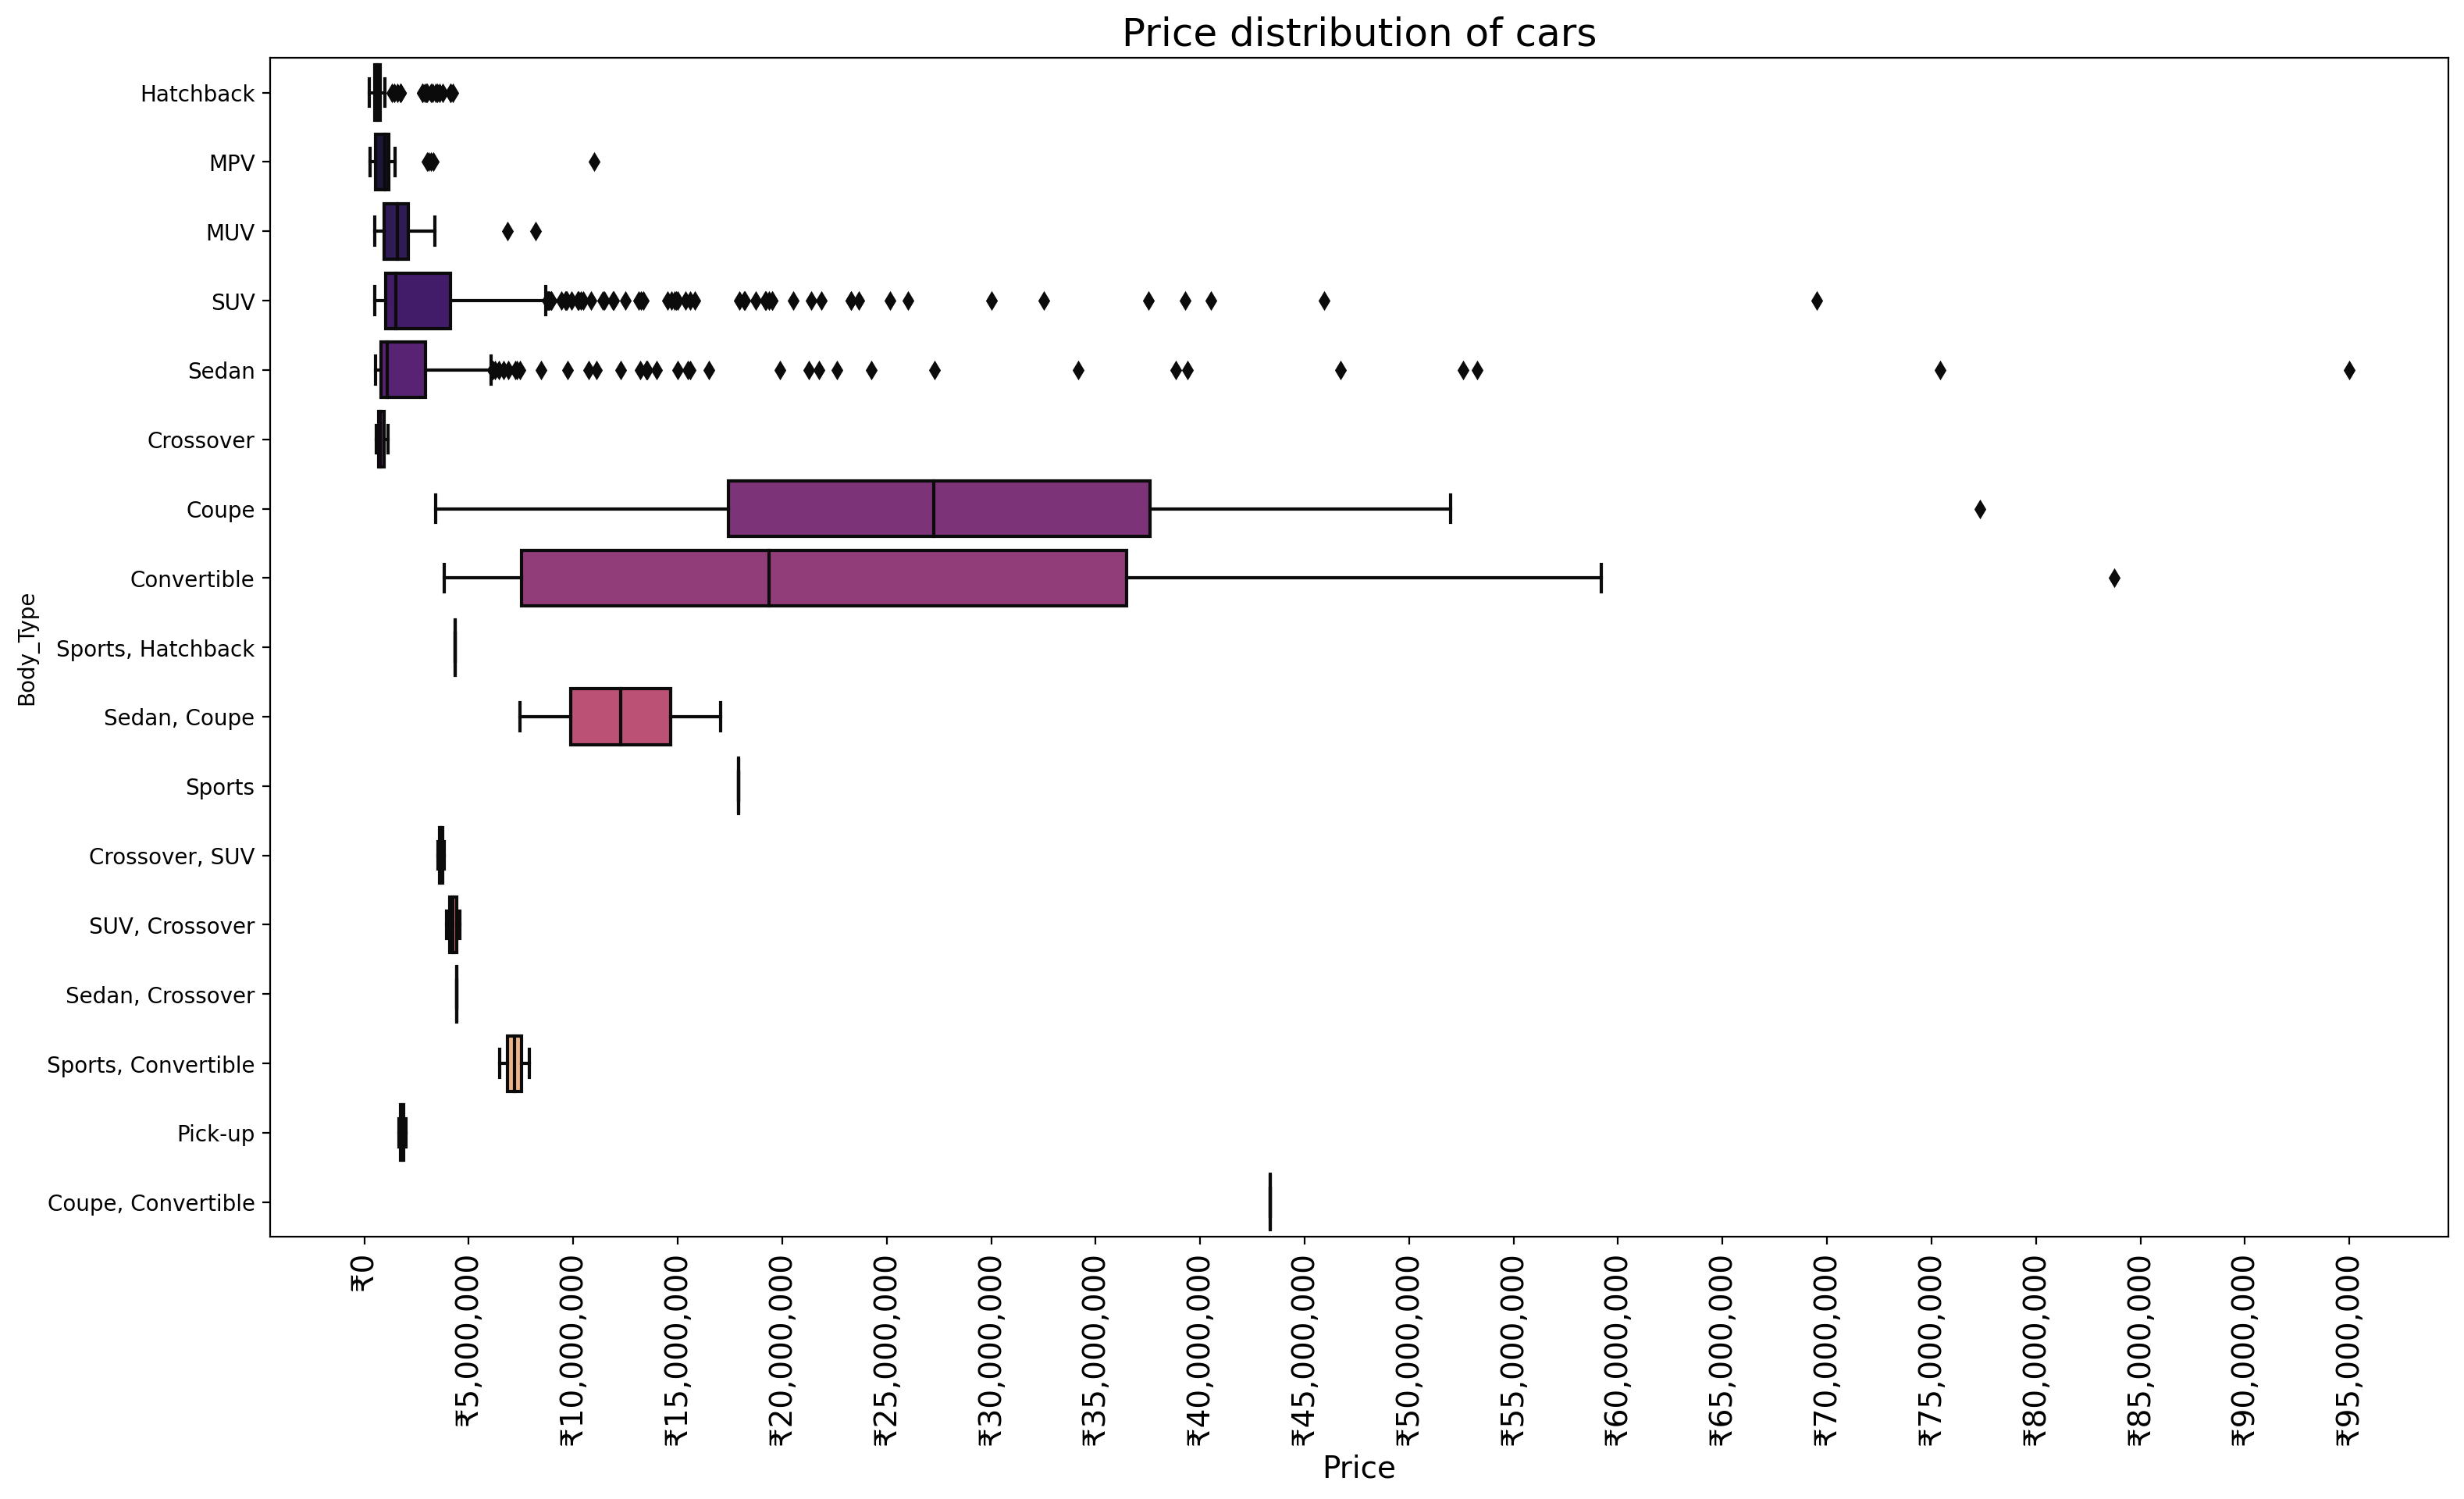

In [59]:
fig,axes=plt.subplots(figsize=(18,10),dpi=200)
sns.boxplot(data=car_df, x='Price',palette='magma', y= 'Body_Type',ax=axes)
axes.set_title('Price distribution of cars',fontsize=18)
axes.set_xlabel('Price',fontsize=14)
axes.set_xticks([i for i in range(0,100000000,5000000)],[f'₹{i:,}' for i in range(0,100000000,5000000)],fontsize=14,rotation=90);

### Price distribution of car based on Fuel Type

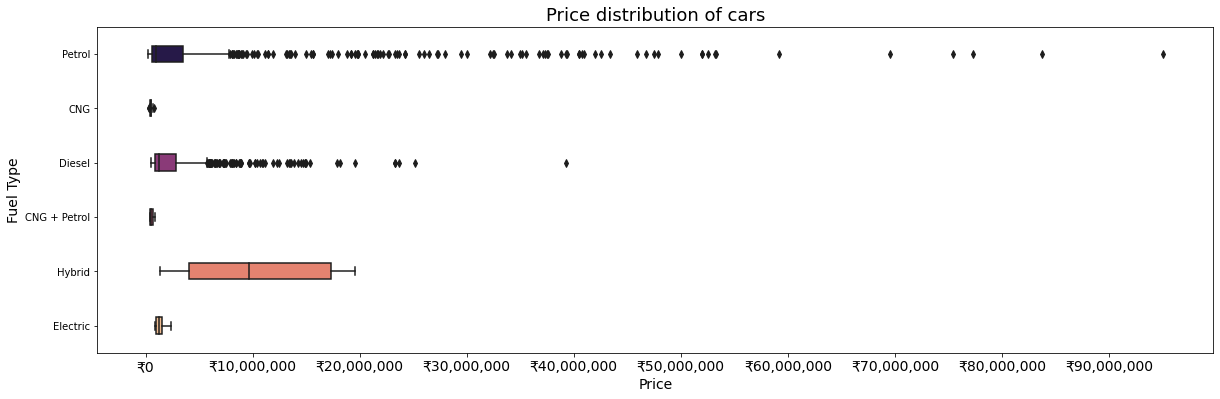

In [148]:
plt.figure(figsize=(20,6))
sns.boxplot(data=car_df, x='Price',width=.3,palette='magma', y= 'Fuel_Type')
plt.title('Price distribution of cars',fontsize=18)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Fuel Type',fontsize=14)
plt.xticks([i for i in range(0,100000000,10000000)],[f'₹{i:,}' for i in range(0,100000000,10000000)],fontsize=14);

* Petrol cars have wide spread distribution of Price
* Most expensive cars run on petrol

### Correlation between Price and engine capacity of the car

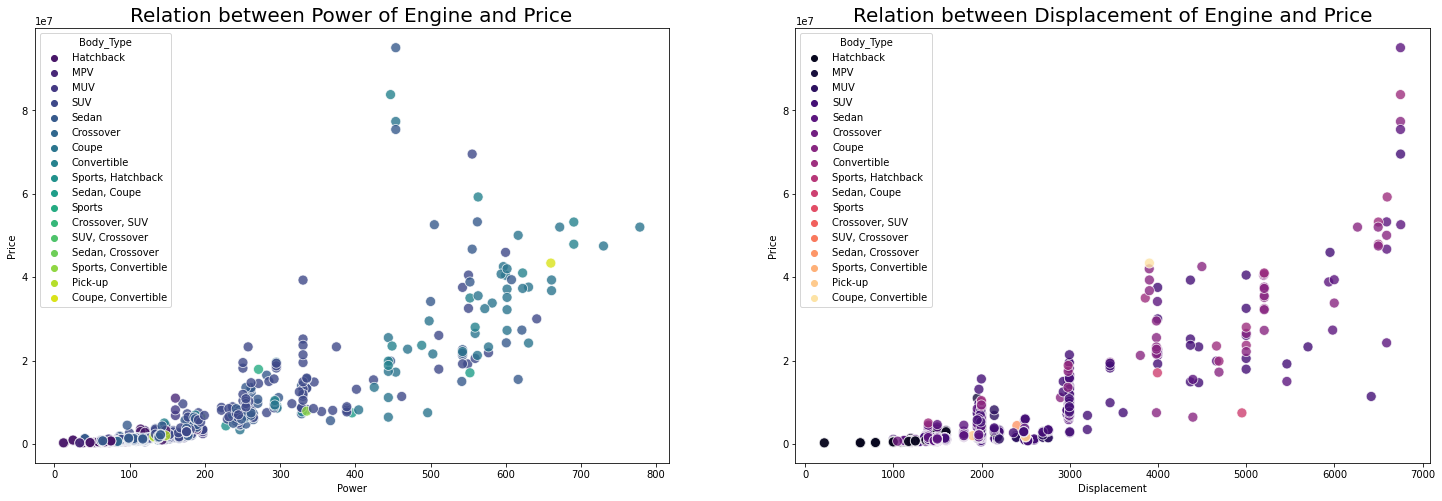

In [37]:
fig,axes=plt.subplots(1,2,figsize=(25,8))
axes[0].set_title("Relation between Power of Engine and Price",fontsize=20)
sns.scatterplot(data=car_df,x='Power',y='Price',hue='Body_Type',palette="viridis",alpha=0.8,s=100,ax=axes[0])
axes[1].set_title("Relation between Displacement of Engine and Price",fontsize=20)
sns.scatterplot(data=car_df,x='Displacement',y='Price',hue='Body_Type',palette="magma",alpha=0.8,s=100,ax=axes[1]);

* As the Power and Displacement of the car increases  Price increases

### Car Companies

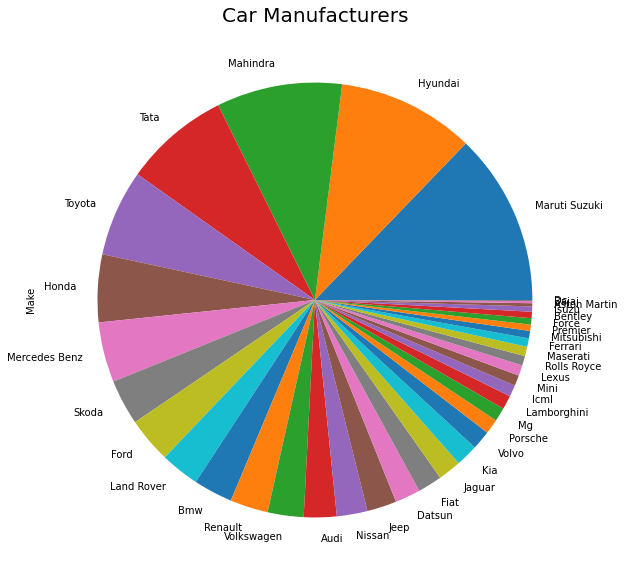

In [112]:
fig,axes=plt.subplots(figsize=(10,10))
plt.title('Car Manufacturers',fontsize=20)
car_df.Make.value_counts().sort_values(ascending=False).plot(ax=axes,kind='pie');

### Segregation of Cars by Fuel used and Transmission Type

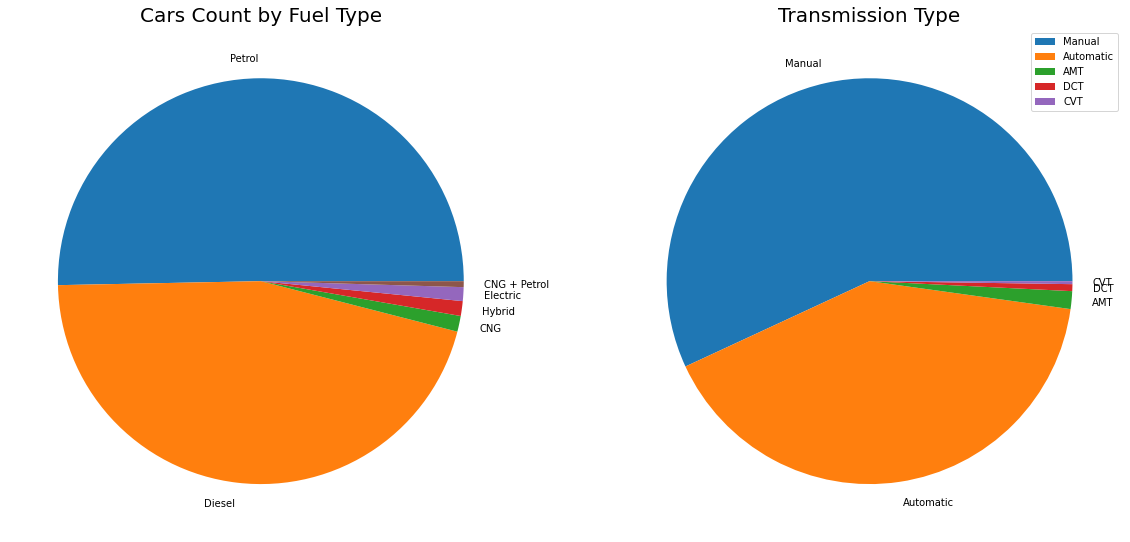

In [98]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (20,10))

car_df.Fuel_Type.value_counts().plot(ax=axes[0], kind='pie')

axes[0].set_ylabel("")
axes[0].set_title("Cars Count by Fuel Type",fontsize=20)

car_df.Type.value_counts().plot(ax=axes[1],kind='pie')
axes[1].set_title('Transmission Type',fontsize=20)
axes[1].set_ylabel('')
plt.legend();

1. Half of the cars running on Petrol and around 45% on diesel
2. Around 60% of cars have manual Transmission and 40% have automatic(CVT+DCT+AMT)

### Cars count based on Body Type

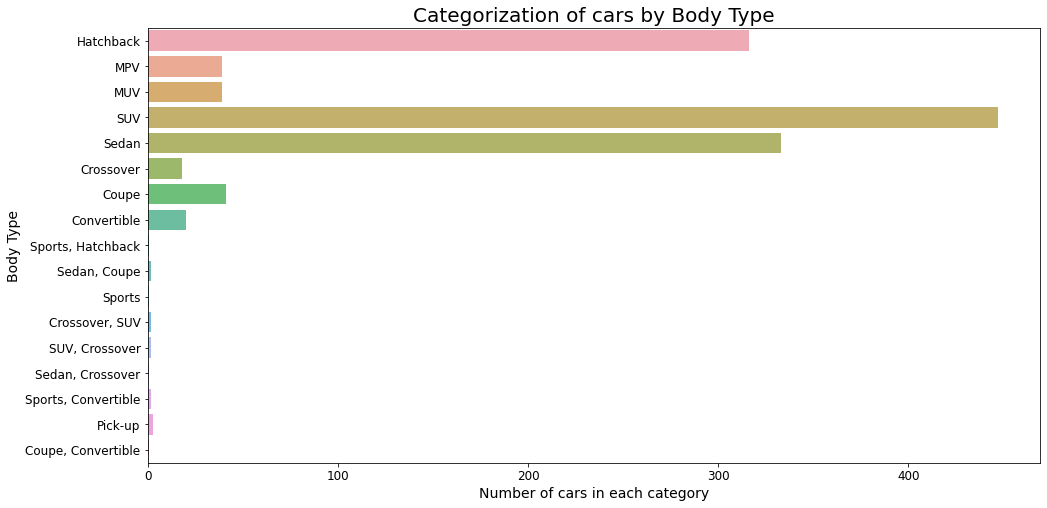

In [116]:
plt.figure(figsize=(16,8))
sns.countplot(data=car_df,y='Body_Type',alpha=0.8)
plt.title('Categorization of cars by Body Type',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of cars in each category',fontsize=14)
plt.ylabel('Body Type',fontsize=14);

* Car Market is dominated by SUVs, Sedans, and Hatchbacks

### Cars count based on Power and Displacement

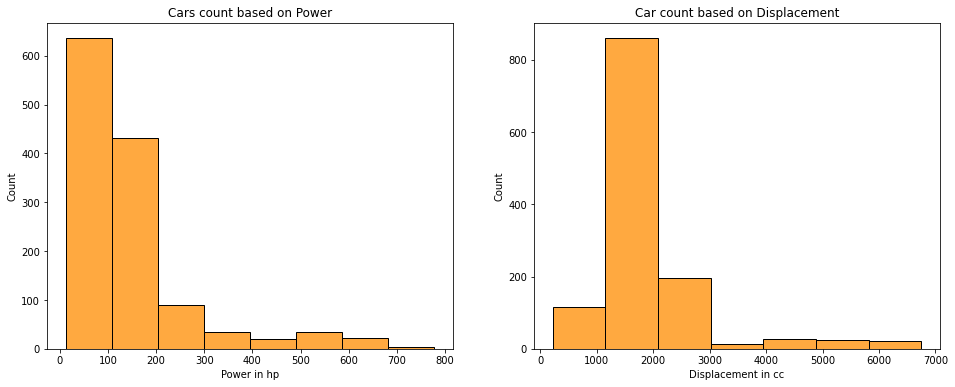

In [145]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('Cars count based on Power')
ax[0].set_xlabel('Power in hp')
sns.histplot(data=car_df,x='Power',ax=ax[0],bins=8,color='darkorange')

ax[1].set_title('Car count based on Displacement')
ax[1].set_xlabel('Displacement in cc')
sns.histplot(data=car_df,x='Displacement',ax=ax[1],bins=7,color='darkorange');

* Around 80% of the cars have power less than 200 hp.
* Around half of the cars are built with engine capacities between 1000 cc and 2000 cc. 

### Engine size vs Fuel tank

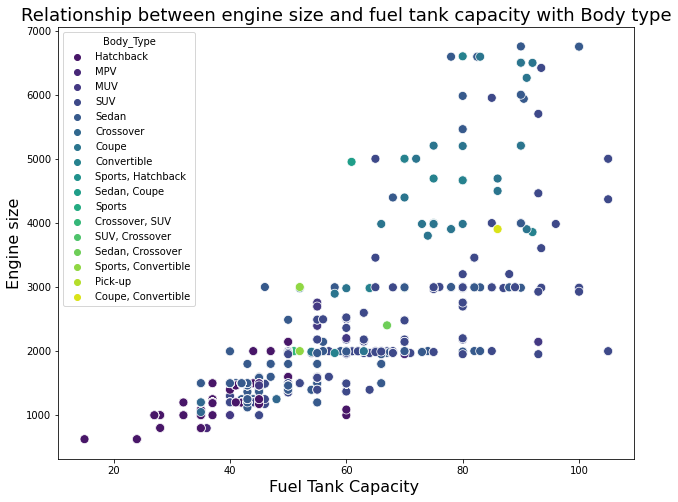

In [72]:
fig=plt.figure(figsize=(8,6))
axes=fig.add_axes([0,0,1,1])
sns.scatterplot(data=car_df, x='Fuel_Tank_Capacity', y='Displacement',s=80,hue='Body_Type',palette='viridis',ax=axes)
axes.set_title('Relationship between engine size and fuel tank capacity with Body type', fontsize=18);
axes.set_xlabel('Fuel Tank Capacity ',fontsize=16)
axes.set_ylabel('Engine size',fontsize=16);

### Correlation between displacement, cylinders, power

<Figure size 2000x2000 with 0 Axes>

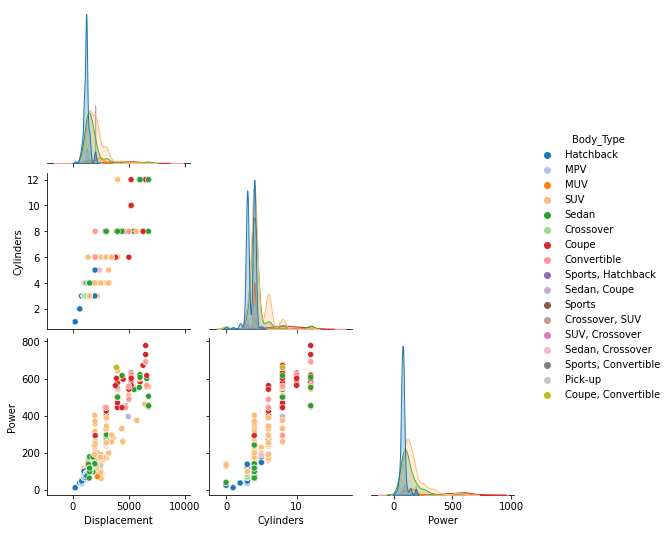

In [63]:
plt.figure(figsize=(10,10),dpi=200)
sns.pairplot(car_df,vars=['Displacement','Cylinders','Power'],hue='Body_Type',diag_kind='kde',palette='tab20',corner=True)

* Displacement(cc), number of Cylinders(2,3,4,6,8,10,12), Power(hp) are highly correlated.
* Mostly Type of car determines the displacement, number of cylinders, and power. 


### Distribution of Doors

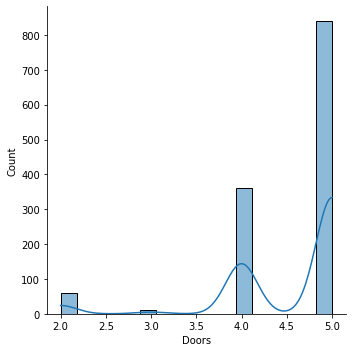

In [76]:
sns.displot(data=car_df,x='Doors',kde=True) 

* Max number of cars have 5 doors

***